In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"V:\Downloads\task_8.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print('Gender',df['gender'].unique(),'\n','SeniorCitizen',df['SeniorCitizen'].unique(),'\n','Partner',df['Partner'].unique(),'\n','Dependents',df['Dependents'].unique(),'\n','PhoneService',df['PhoneService'].unique(),'\n','MultipleLines',df['MultipleLines'].unique(),'\n','InternetService',df['InternetService'].unique(),'\n','OnlineSecurity',df['OnlineSecurity'].unique(),'\n','OnlineBackup',df['OnlineBackup'].unique(),'\n','DeviceProtection',df['DeviceProtection'].unique(),'\n','TechSupport',df['TechSupport'].unique(),'\n','StreamingTV',df['StreamingTV'].unique(),'\n','StreamingMovies',df['StreamingMovies'].unique(),'\n','Contract',df['Contract'].unique(),'\n','PaperlessBilling',df['PaperlessBilling'].unique(),'\n','PaymentMethod',df['PaymentMethod'].unique(),'\n','Churn',df['Churn'].unique())

Gender ['Female' 'Male' '1' '0'] 
 SeniorCitizen [0 1] 
 Partner ['Yes' 'No' '0' '1'] 
 Dependents ['No' 'Yes'] 
 PhoneService ['No' 'Yes'] 
 MultipleLines ['No phone service' 'No' 'Yes'] 
 InternetService ['DSL' 'Fiber optic' 'No'] 
 OnlineSecurity ['No' 'Yes' 'No internet service'] 
 OnlineBackup ['Yes' 'No' 'No internet service'] 
 DeviceProtection ['No' 'Yes' 'No internet service'] 
 TechSupport ['No' 'Yes' 'No internet service'] 
 StreamingTV ['No' 'Yes' 'No internet service'] 
 StreamingMovies ['No' 'Yes' 'No internet service'] 
 Contract ['Month-to-month' 'One year' 'Two year'] 
 PaperlessBilling ['Yes' 'No'] 
 PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
 Churn ['No' 'Yes']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df=df[~df['gender'].isin(['1','0'])]

In [9]:
df.drop(['customerID'],axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   SeniorCitizen     7027 non-null   int64  
 2   Partner           7027 non-null   object 
 3   Dependents        7027 non-null   object 
 4   tenure            7027 non-null   int64  
 5   PhoneService      7027 non-null   object 
 6   MultipleLines     7027 non-null   object 
 7   InternetService   7027 non-null   object 
 8   OnlineSecurity    7027 non-null   object 
 9   OnlineBackup      7027 non-null   object 
 10  DeviceProtection  7027 non-null   object 
 11  TechSupport       7027 non-null   object 
 12  StreamingTV       7027 non-null   object 
 13  StreamingMovies   7027 non-null   object 
 14  Contract          7027 non-null   object 
 15  PaperlessBilling  7027 non-null   object 
 16  PaymentMethod     7027 non-null   object 
 17  

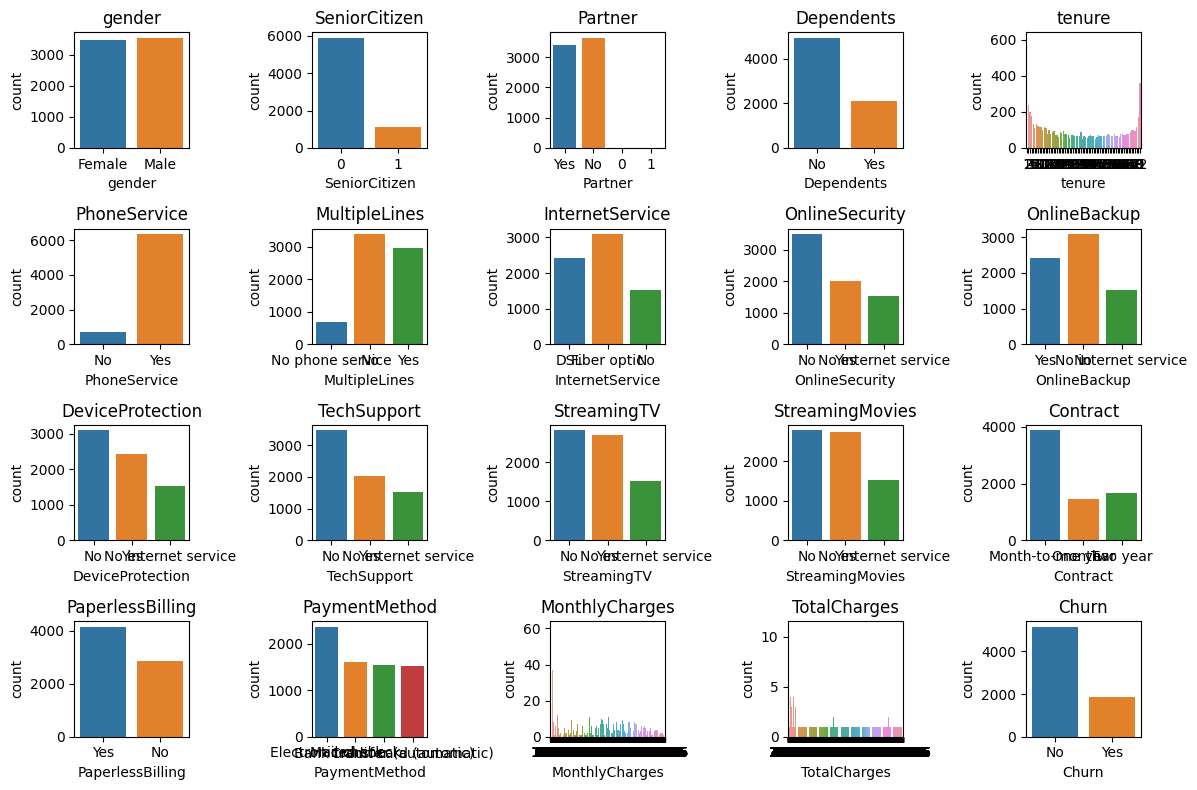

In [12]:
num_cols = len(df.columns)
num_rows = int(num_cols ** 0.5)
num_cols_subplot = int(num_cols / num_rows)
if num_cols_subplot * num_rows < num_cols:
    num_cols_subplot += 1
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(12, 8))
axes = axes.ravel()
for i, column in enumerate(df.columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()
#Viewing the distribution of the data

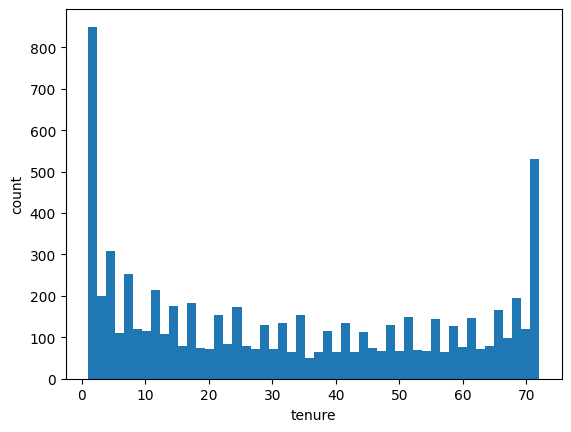

In [13]:
plt.hist(df['tenure'],bins=50)
plt.xlabel('tenure')
plt.ylabel('count')
plt.show()
#Viewing the distribution of the data

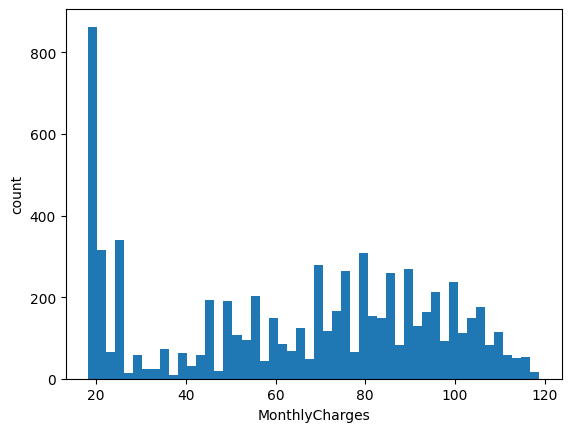

In [14]:
plt.hist(df['MonthlyCharges'],bins=50)
plt.xlabel('MonthlyCharges')
plt.ylabel('count')
plt.show()
#Viewing the distribution of the data

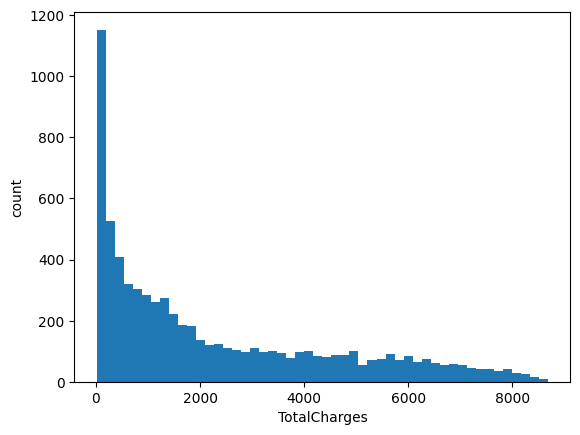

In [15]:
plt.hist(df['TotalCharges'],bins=50)
plt.xlabel('TotalCharges')
plt.ylabel('count')
plt.show()
#Viewing the distribution of the data

<Axes: xlabel='gender', ylabel='count'>

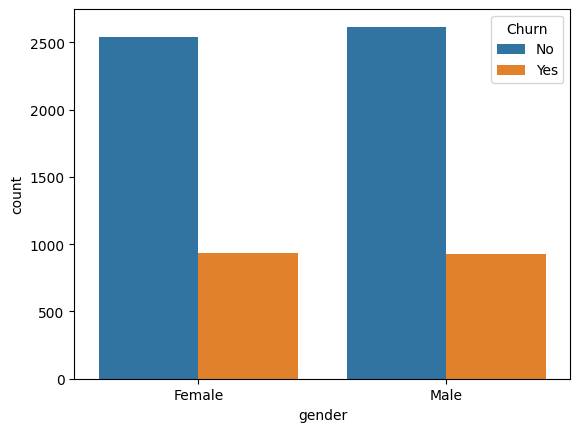

In [16]:
sns.countplot(x='gender',hue='Churn',data=df)
#gender vs churn

<Axes: xlabel='SeniorCitizen', ylabel='count'>

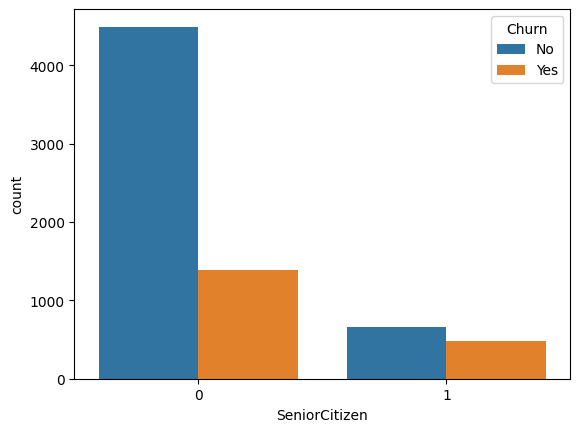

In [17]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
#SeniorCitizen vs churn

<Axes: xlabel='Partner', ylabel='count'>

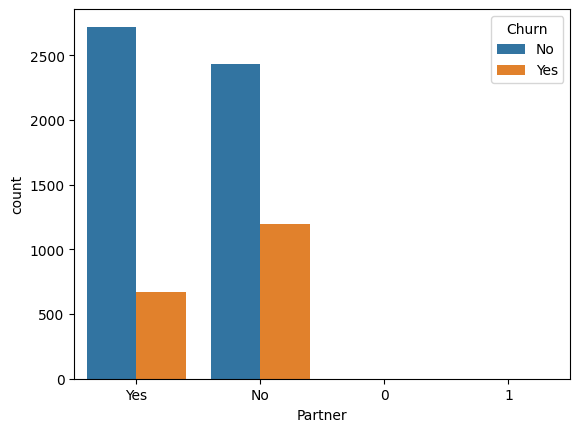

In [18]:
sns.countplot(x='Partner',hue='Churn',data=df)
#Partner vs churn

<Axes: xlabel='Dependents', ylabel='count'>

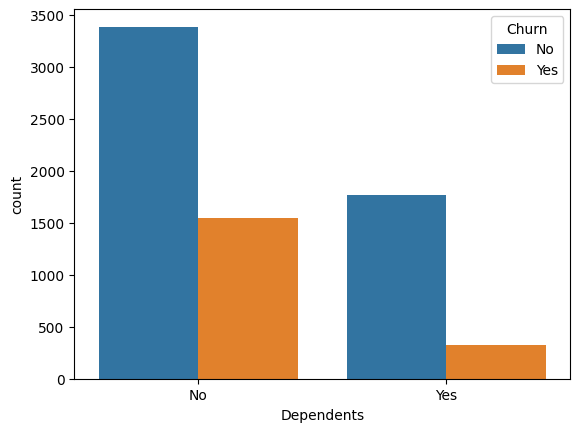

In [19]:
sns.countplot(x='Dependents',hue='Churn',data=df)
#Dependents vs churn

<Axes: xlabel='PhoneService', ylabel='count'>

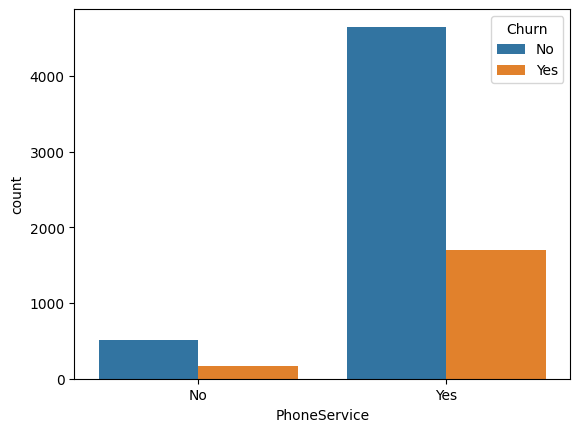

In [20]:
sns.countplot(x='PhoneService',hue='Churn',data=df)
#PhoneService vs churn

<Axes: xlabel='MultipleLines', ylabel='count'>

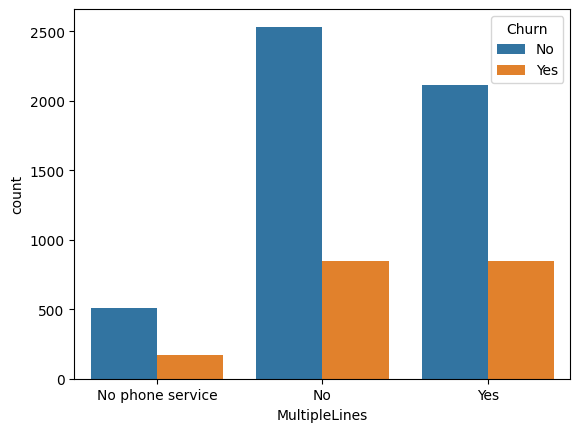

In [21]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)
#MultipleLines vs churn

<Axes: xlabel='InternetService', ylabel='count'>

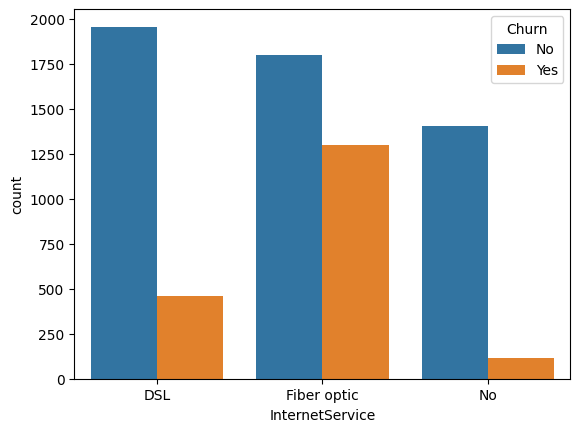

In [22]:
sns.countplot(x='InternetService',hue='Churn',data=df)
#InternetService vs churn

<Axes: xlabel='OnlineSecurity', ylabel='count'>

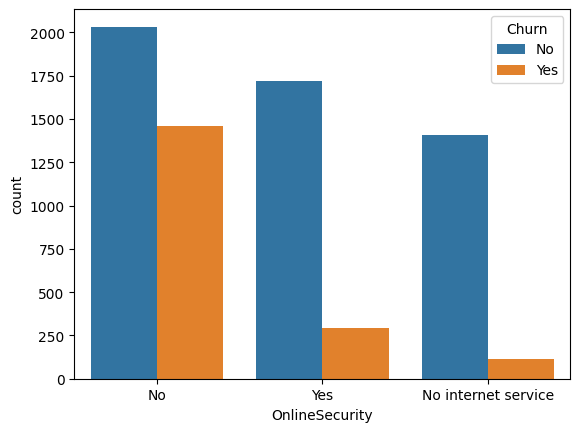

In [23]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)
#OnlineSecurity vs churn

<Axes: xlabel='OnlineBackup', ylabel='count'>

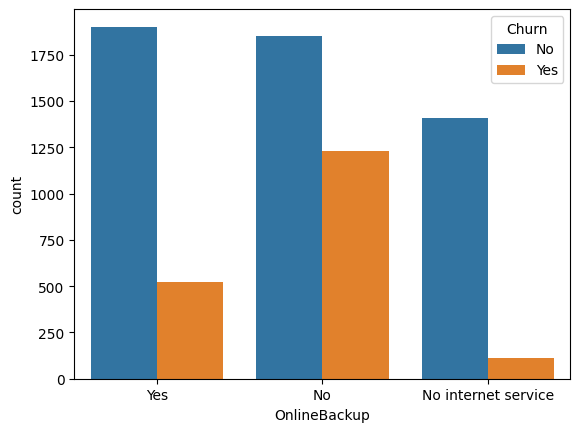

In [24]:
sns.countplot(x='OnlineBackup',hue='Churn',data=df)
#OnlineBackup vs churn

<Axes: xlabel='DeviceProtection', ylabel='count'>

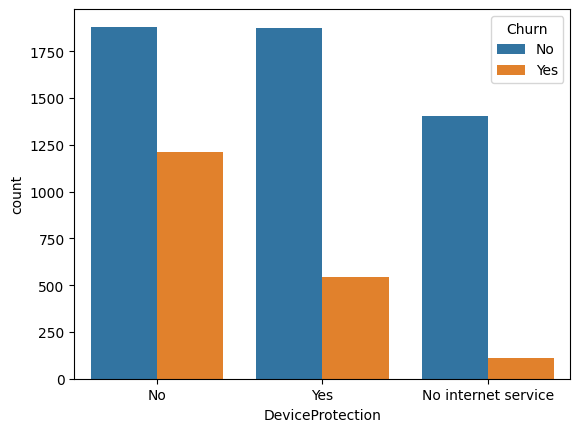

In [25]:
sns.countplot(x='DeviceProtection',hue='Churn',data=df)
#DeviceProtection vs churn

<Axes: xlabel='TechSupport', ylabel='count'>

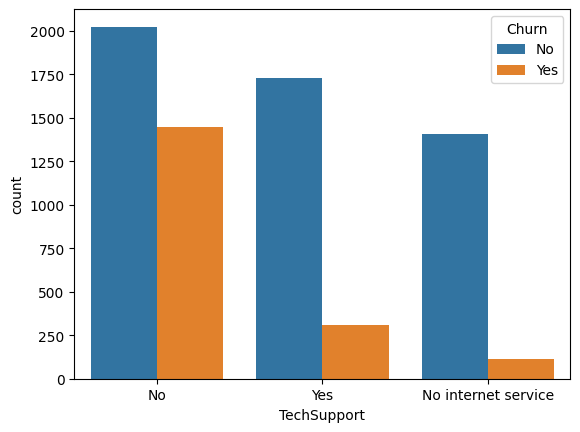

In [26]:
sns.countplot(x='TechSupport',hue='Churn',data=df)
#TechSupport vs churn

<Axes: xlabel='StreamingTV', ylabel='count'>

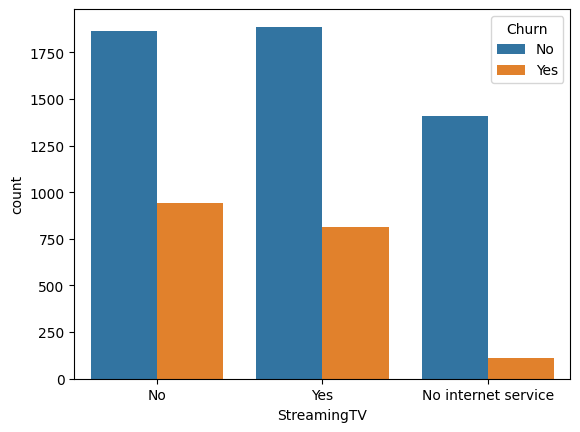

In [27]:
sns.countplot(x='StreamingTV',hue='Churn',data=df)
#StreamingTV vs churn

<Axes: xlabel='StreamingMovies', ylabel='count'>

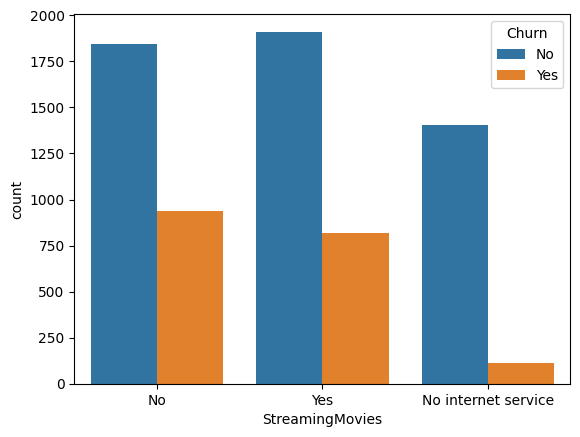

In [28]:
sns.countplot(x='StreamingMovies',hue='Churn',data=df)
#StreamingMovies vs churn

<Axes: xlabel='Contract', ylabel='count'>

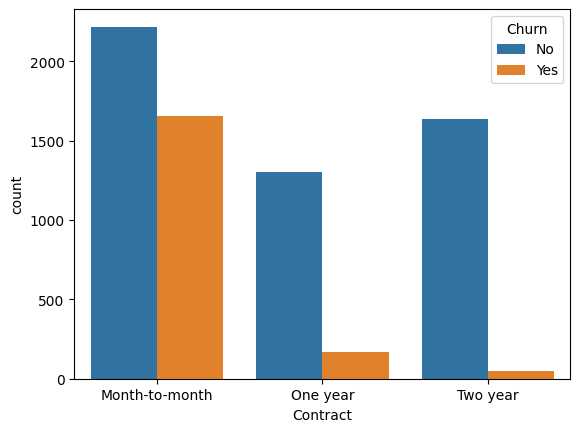

In [29]:
sns.countplot(x='Contract',hue='Churn',data=df)
#Contract vs churn

<Axes: xlabel='PaperlessBilling', ylabel='count'>

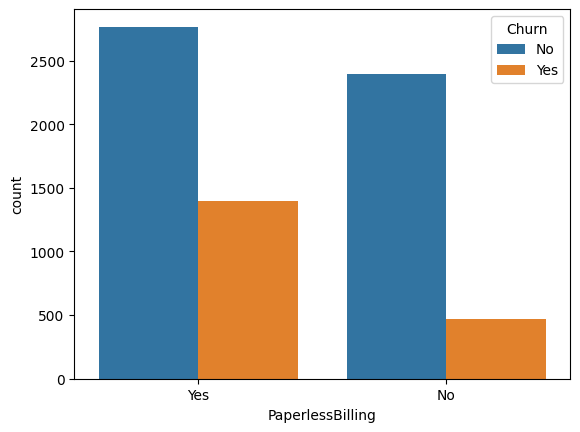

In [30]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=df)
#PaperlessBilling vs churn

<Axes: xlabel='PaymentMethod', ylabel='count'>

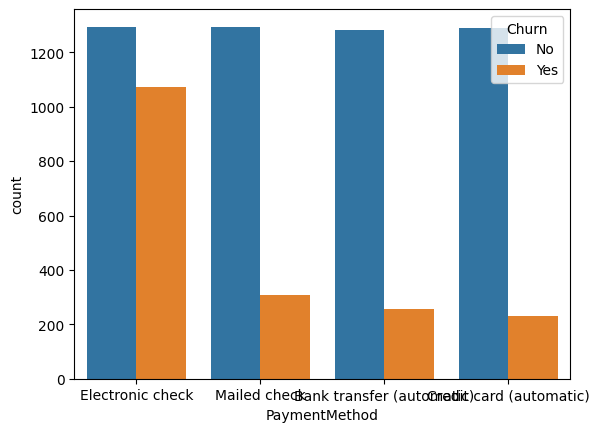

In [31]:
sns.countplot(x='PaymentMethod',hue='Churn',data=df)
#PaymentMethod vs churn

In [32]:
#Data Preprocessing
# Converting the categorical data into numerical data (Label Encoding)
df['PhoneService']=df['PhoneService'].map({'No':0,'Yes':1}).astype('int8')
df['MultipleLines']=df['MultipleLines'].map({'No':1,'Yes':2,'No phone service':0}).astype('int8')
df['Partner']=df['Partner'].map({'No':0,'Yes':1,'0':0,'1':1}).astype('int8')
df['Dependents']=df['Dependents'].map({'No':0,'Yes':1}).astype('int8')
df['gender']=df['gender'].map({'Male':0,'Female':1}).astype('int8')
df['InternetService']=df['InternetService'].map({'DSL':1,'Fiber optic':2,'No':0}).astype('int8')
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['OnlineBackup']=df['OnlineBackup'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['DeviceProtection']=df['DeviceProtection'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['TechSupport']=df['TechSupport'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['StreamingTV']=df['StreamingTV'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['StreamingMovies']=df['StreamingMovies'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['Contract']=df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2}).astype('int8')
df['PaperlessBilling']=df['PaperlessBilling'].map({'No':0,'Yes':1}).astype('int8')
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}).astype('int8')
df['Churn']=df['Churn'].map({'No':0,'Yes':1}).astype('int8')

<Axes: >

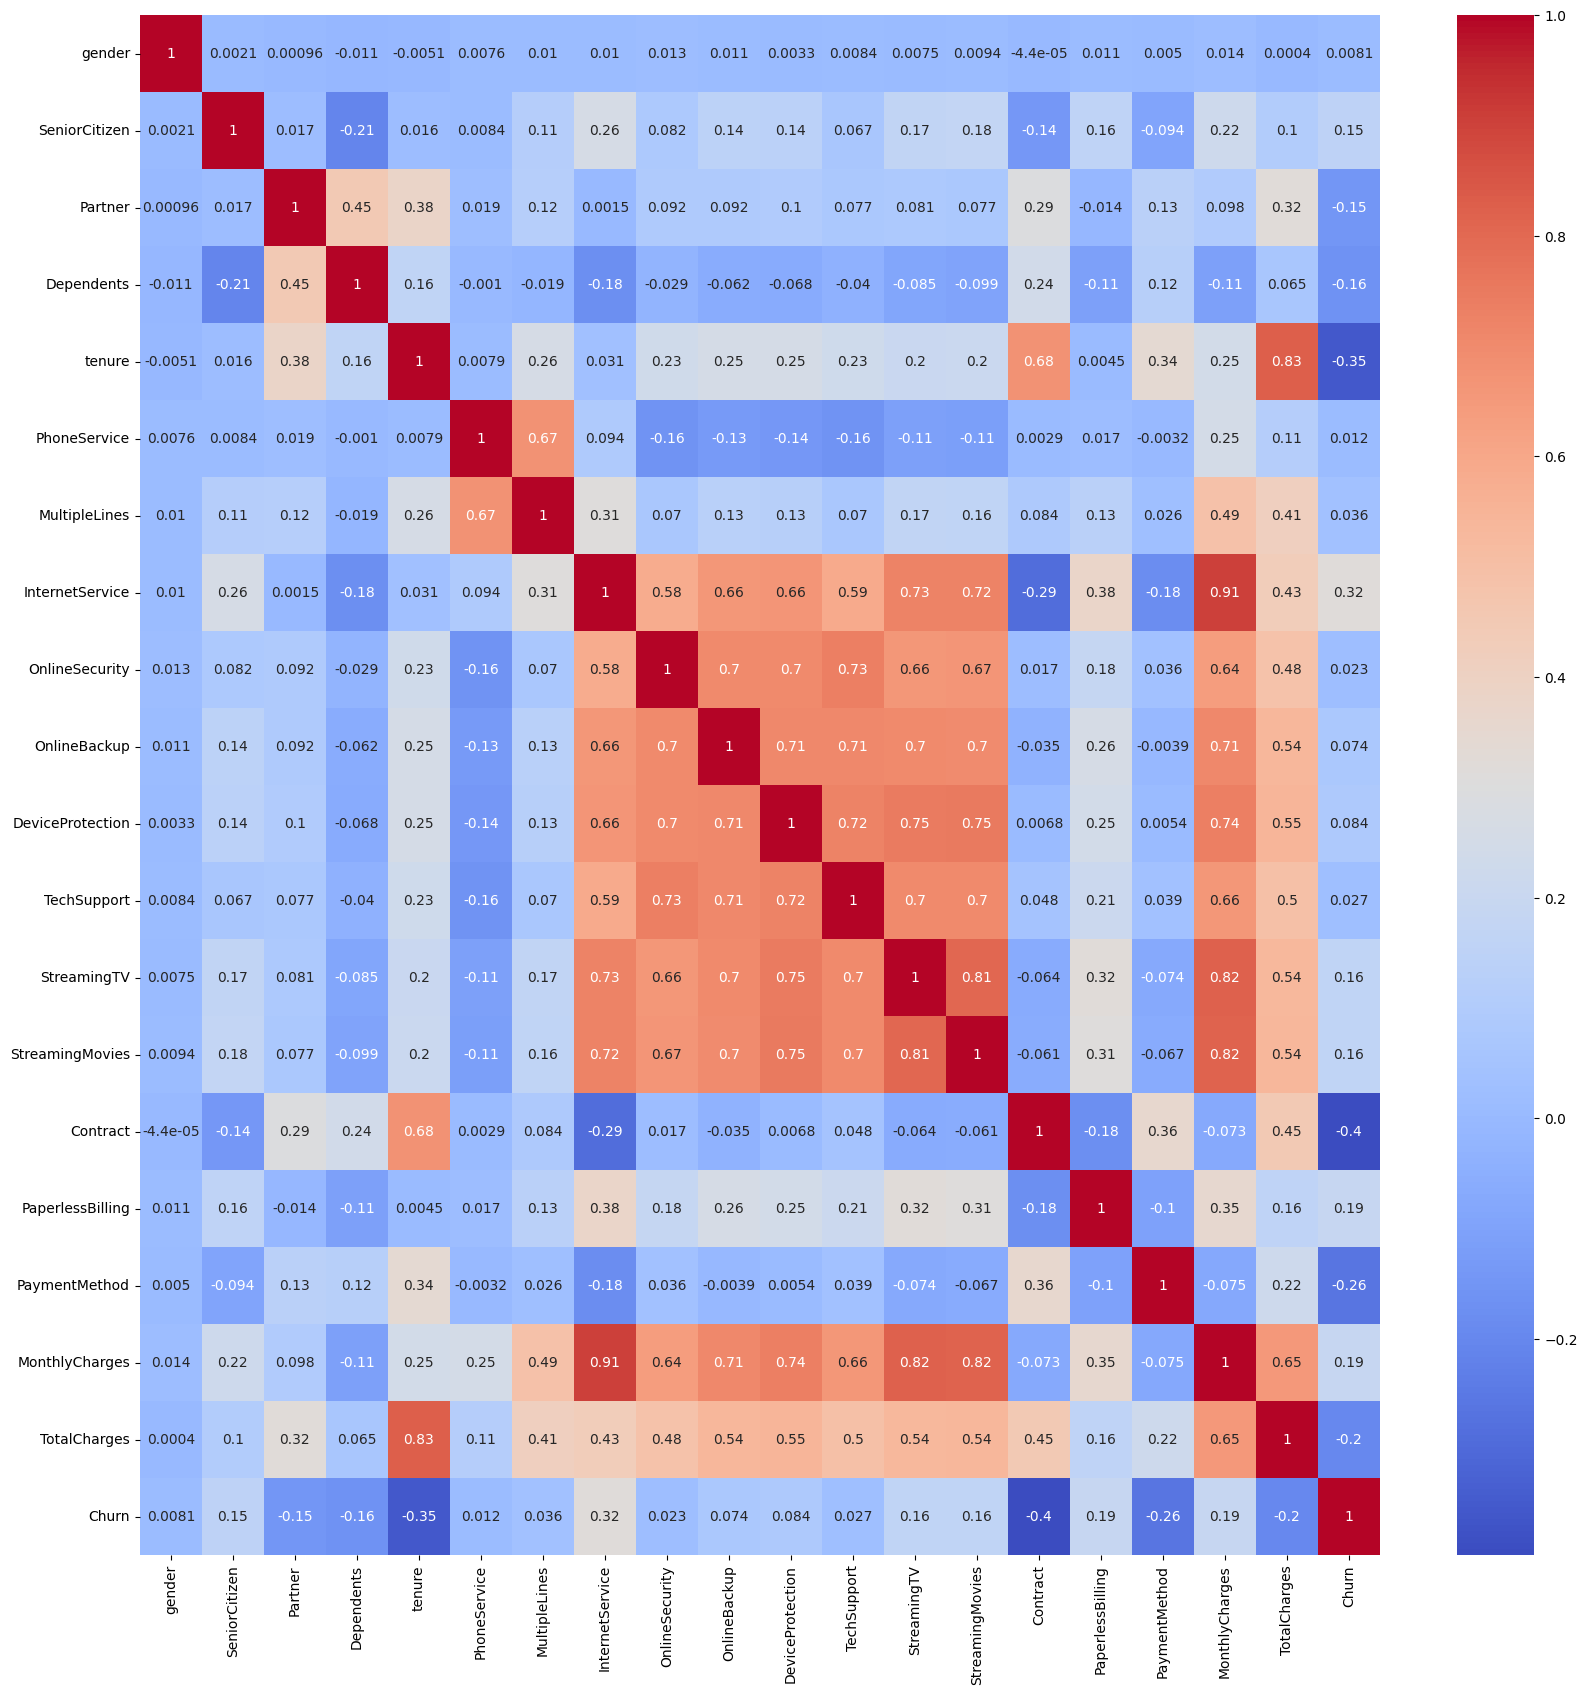

In [33]:
# Corelation Matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [34]:
# Categorical Features feature selection
categorical_features=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [35]:
print(categorical_features)
len(categorical_features)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


16

In [36]:
# Numerical Features feature selection
numerical_features=['tenure','MonthlyCharges','TotalCharges']

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
features = df.loc[:,categorical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k='all')
fit = best_features.fit(features,target)
#threshold = np.mean(fit.scores_)
threshold = 60
selected_features = features.columns[fit.scores_ > threshold]

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])
selected_featureScores = featureScores.loc[selected_features]
print(selected_featureScores)
rejected_featureScores = featureScores.loc[~featureScores.index.isin(selected_features)]
# Rejecting features with low chi squared score (less than threshold)
# features with low chi squared score are not likely related to target variable

                  Chi Squared Score
SeniorCitizen            133.913928
Partner                   81.797456
Dependents               131.129586
InternetService          348.253340
StreamingTV               93.036474
StreamingMovies           91.073570
Contract                1110.390518
PaperlessBilling         104.757371
PaymentMethod            488.869275


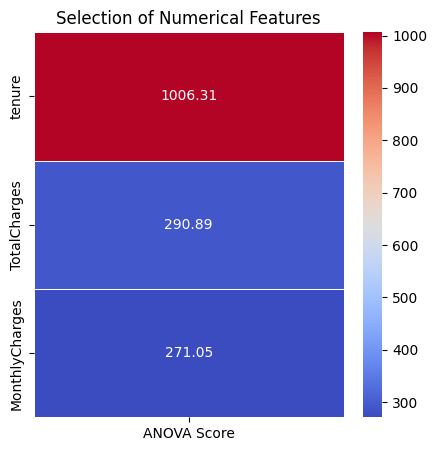

In [38]:
from sklearn.feature_selection import f_classif
features = df.loc[:,numerical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),cmap='coolwarm',annot = True,linewidths = 0.4,linecolor = 'white',fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()
# No numerical features are rejected as all of them have high ANOVA score and corelation with target variable

In [39]:
# dropping rejected features
df.drop(columns=rejected_featureScores.index,inplace=True)

In [40]:
df.head()
# right data for model building

,SeniorCitizen,Partner,Dependents,tenure,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,1,1,0,1,0,29.85,29.85,0
1,0,0,0,34,1,1,1,1,0,1,56.95,1889.50,0
2,0,0,0,2,1,1,1,0,1,1,53.85,108.15,1
3,0,0,0,45,1,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,2,2,1,1,0,1,0,70.70,151.65,1


In [41]:
df.shape

(7027, 13)

In [42]:
# Reason for going data balancing
# The data is highly imbalanced as I tried to build model without balancing the data and the model was predicting all the values as 0
# So I have to balance the data to get better results
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy = 1)
x=df.drop(columns=['Churn'])
y=df['Churn']
x, y = over.fit_resample(x,y)
Counter(y)

Counter({0: 5159, 1: 5159})

In [43]:
# Model Building
# Train Test Split
from sklearn.model_selection import *
from sklearn.metrics import *
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [44]:
# fitting the model, evaluating the model and plotting the ROC_AUC curve
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    a=cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    b=roc_auc_score(y_test, prediction)
    print("Cross Validation Score: ", '{0:.2%}'.format(a))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    # Set custom color map and style
    cmap = sns.color_palette("plasma")  # Set the desired color map
    sns.set_style("whitegrid")  # Set the desired style
    sns.heatmap(cm, annot=labels, cmap=cmap, fmt='', cbar=False)
    # Classification Report
    cr=classification_report(y_test, classifier.predict(x_test),zero_division=0)
    print(cr)

In [45]:
# #Logistic Regression
# from sklearn.linear_model import LogisticRegression
# classifier_lr = LogisticRegression(solver='saga', max_iter=10000)
# classifier_lr = LogisticRegression(penalty='l2')
# model(classifier_lr, x_train, y_train, x_test, y_test)
# model_evaluation(classifier_lr, x_test, y_test)

# NOT USING LOGISTIC REGRESSION AS IT IS NOT GIVING GOOD RESULTS

Cross Validation Score:  84.77%
ROC_AUC Score:  76.99%


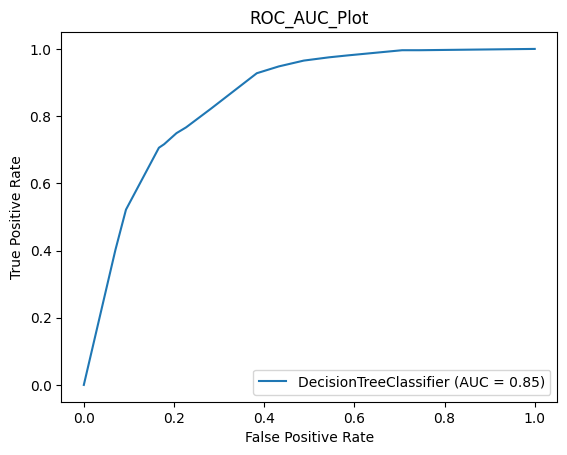

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1027
           1       0.77      0.77      0.77      1037

    accuracy                           0.77      2064
   macro avg       0.77      0.77      0.77      2064
weighted avg       0.77      0.77      0.77      2064



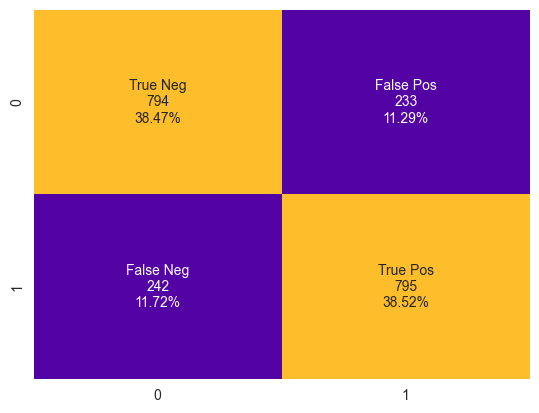

In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt,x_train,y_train,x_test,y_test)
model_evaluation(classifier_dt,x_test,y_test)

Cross Validation Score:  86.46%
ROC_AUC Score:  79.95%


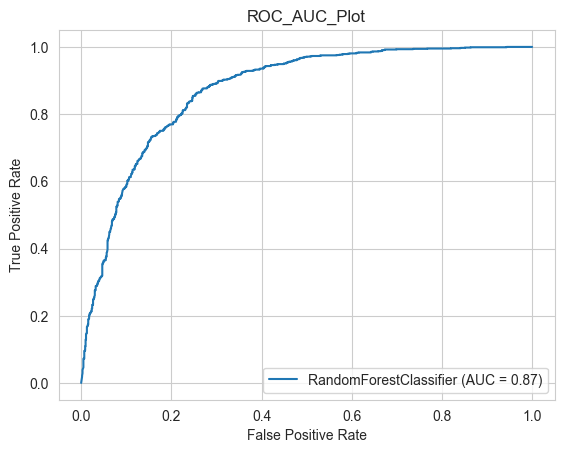

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1027
           1       0.76      0.88      0.81      1037

    accuracy                           0.80      2064
   macro avg       0.81      0.80      0.80      2064
weighted avg       0.81      0.80      0.80      2064



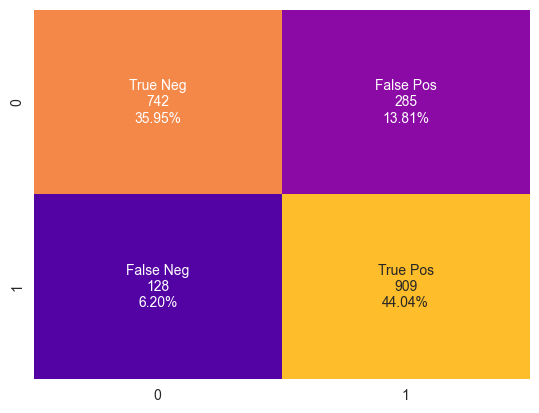

In [47]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train,y_train,x_test,y_test)
model_evaluation(classifier_rf,x_test,y_test)

Cross Validation Score:  74.21%
ROC_AUC Score:  66.89%


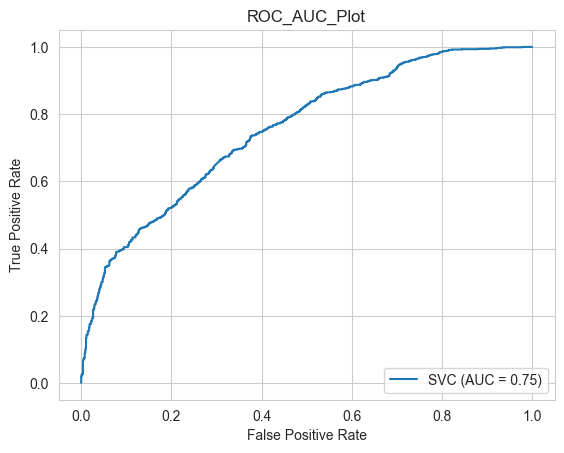

              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1027
           1       0.69      0.61      0.65      1037

    accuracy                           0.67      2064
   macro avg       0.67      0.67      0.67      2064
weighted avg       0.67      0.67      0.67      2064



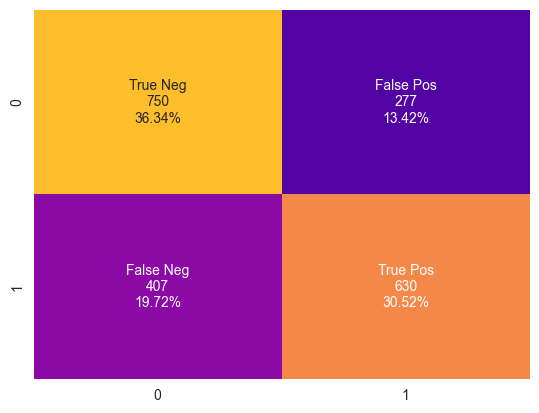

In [48]:
#SVM
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', probability=True)
model(classifier_svm, x_train, y_train, x_test, y_test)
model_evaluation(classifier_svm, x_test, y_test)

Cross Validation Score:  83.97%
ROC_AUC Score:  76.71%


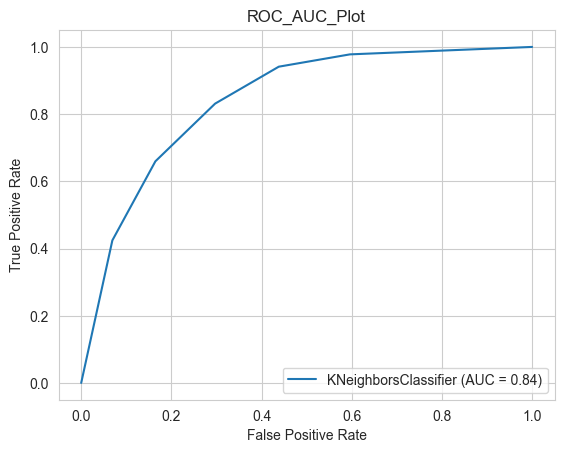

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1027
           1       0.74      0.83      0.78      1037

    accuracy                           0.77      2064
   macro avg       0.77      0.77      0.77      2064
weighted avg       0.77      0.77      0.77      2064



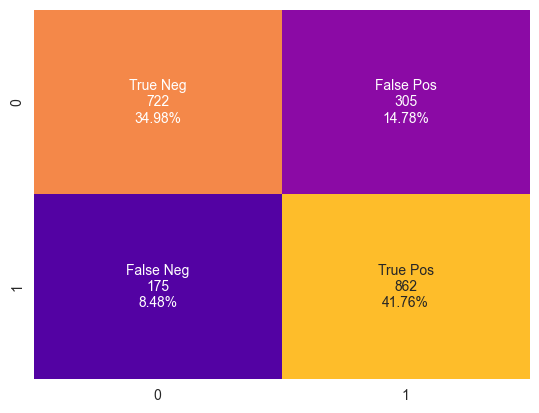

In [49]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)
model(classifier_knn, x_train, y_train, x_test, y_test)
model_evaluation(classifier_knn, x_test, y_test)

Cross Validation Score:  87.95%
ROC_AUC Score:  80.65%


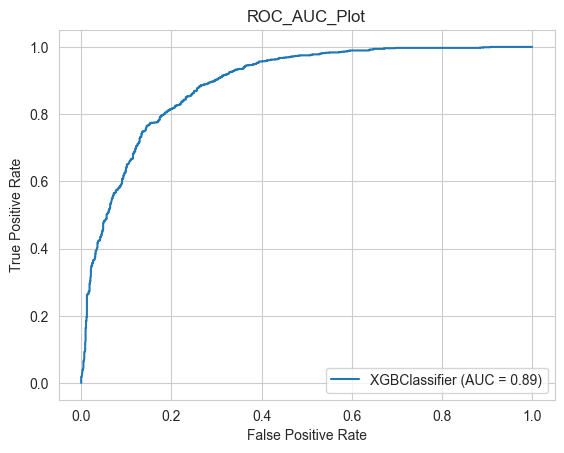

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1027
           1       0.78      0.85      0.82      1037

    accuracy                           0.81      2064
   macro avg       0.81      0.81      0.81      2064
weighted avg       0.81      0.81      0.81      2064



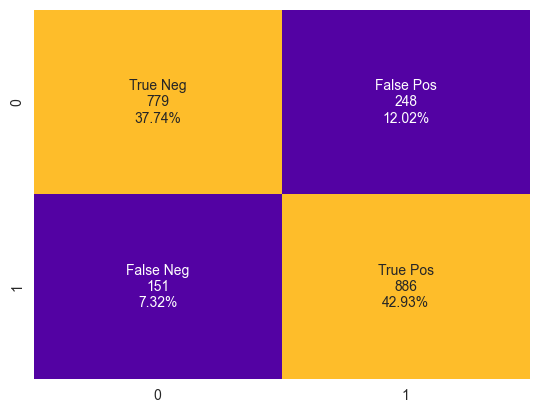

In [50]:
#xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

[LightGBM] [Info] Number of positive: 4122, number of negative: 4132
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 8254, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499394 -> initscore=-0.002423
[LightGBM] [Info] Start training from score -0.002423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

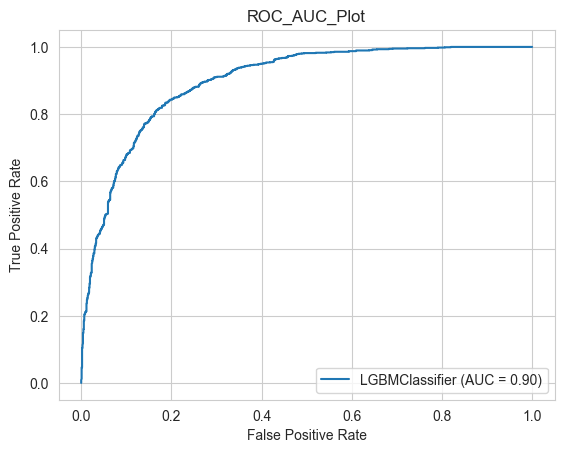

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1027
           1       0.81      0.84      0.83      1037

    accuracy                           0.82      2064
   macro avg       0.82      0.82      0.82      2064
weighted avg       0.82      0.82      0.82      2064



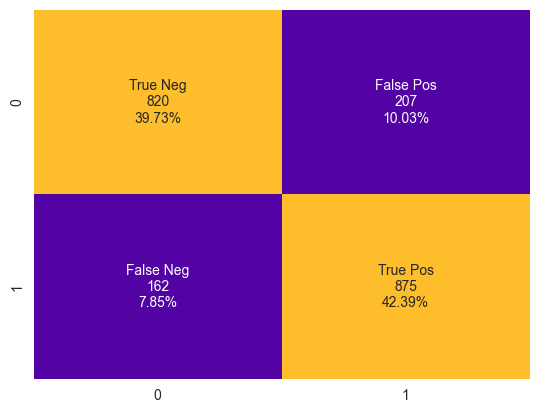

In [51]:
#LightGBM
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(learning_rate=0.1,force_row_wise=True, max_depth=3, n_estimators=1000, num_leaves=31, random_state=42)

model(classifier_lgbm,x_train,y_train,x_test,y_test)
model_evaluation(classifier_lgbm, x_test, y_test)

0:	learn: 0.6596823	total: 156ms	remaining: 15.4s
1:	learn: 0.6302729	total: 162ms	remaining: 7.93s
2:	learn: 0.6067775	total: 166ms	remaining: 5.38s
3:	learn: 0.5863187	total: 172ms	remaining: 4.12s
4:	learn: 0.5687426	total: 179ms	remaining: 3.39s
5:	learn: 0.5538365	total: 183ms	remaining: 2.87s
6:	learn: 0.5406438	total: 189ms	remaining: 2.51s
7:	learn: 0.5293731	total: 196ms	remaining: 2.25s
8:	learn: 0.5195421	total: 201ms	remaining: 2.03s
9:	learn: 0.5103535	total: 207ms	remaining: 1.86s
10:	learn: 0.5030993	total: 213ms	remaining: 1.72s
11:	learn: 0.4954903	total: 218ms	remaining: 1.6s
12:	learn: 0.4889253	total: 224ms	remaining: 1.5s
13:	learn: 0.4831775	total: 230ms	remaining: 1.41s
14:	learn: 0.4782326	total: 235ms	remaining: 1.33s
15:	learn: 0.4738864	total: 241ms	remaining: 1.26s
16:	learn: 0.4700100	total: 247ms	remaining: 1.21s
17:	learn: 0.4662462	total: 253ms	remaining: 1.15s
18:	learn: 0.4629387	total: 259ms	remaining: 1.1s
19:	learn: 0.4599241	total: 264ms	remaining:

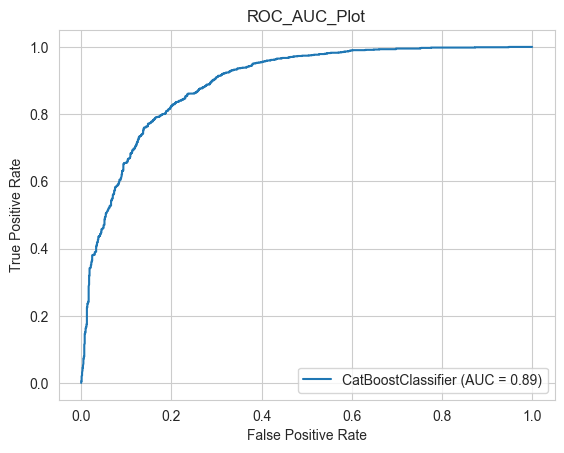

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1027
           1       0.79      0.85      0.82      1037

    accuracy                           0.81      2064
   macro avg       0.81      0.81      0.81      2064
weighted avg       0.81      0.81      0.81      2064



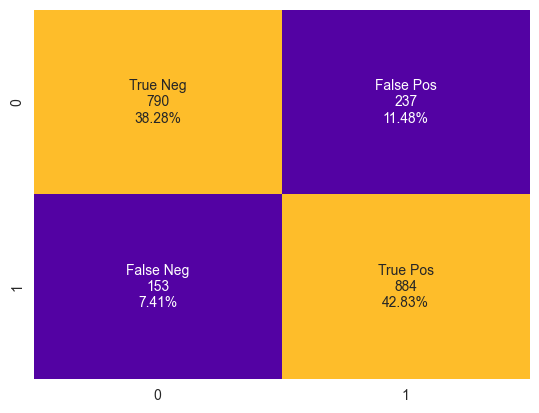

In [52]:
from catboost import CatBoostClassifier
classifier_catboost = CatBoostClassifier(learning_rate=0.1, iterations=100, depth=6)
model(classifier_catboost, x_train, y_train, x_test, y_test)
model_evaluation(classifier_catboost, x_test, y_test)

Performance of the models (AUC)
1. Light GBM: 0.89
2. Catboost AUC: 0.88
4. XGBoost: 0.88
5. Random forest: 0.87
6. Decision Tree: 0.85
7. Support Vector Machine: 
8. KNN: 0.83
